> Benjamin Nikholas

> Data Science / JCSDOL-014

> Modul 2 - Tugas 25

> 18 Juni 2024
---
---

# Exercise: Data Visualization
- Tampilkan visualisasi yang sesuai
- Berikan insightnya

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel('Sample - Superstore.xlsx', sheet_name='Orders')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

### **No.1**

Tampilkan distribusi Sales

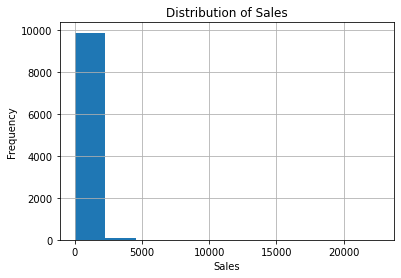

In [10]:
plt.hist(df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.grid(True)
plt.show()

### **No.2**

Apakah ada outliers di variable Sales? Di nilai berapa nilai Sales dianggap outliers?

In [101]:
Q1 = df.Sales.quantile(0.25)
Q3 = df.Sales.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df.Sales < lower_bound) | (df.Sales > upper_bound)]


In [110]:
mean_sales = df.Sales.mean()
std_sales = df.Sales.std()

df['Z_score'] = (df.Sales - mean_sales) / std_sales

print(f'Terdapat Outlier di kolom Sales dan dianggap outlier jika berada dibawah angka {lower_bound:.2f} atau diatas {upper_bound:.2f}')

Terdapat Outlier di kolom Sales dan dianggap outlier jika berada dibawah angka -271.71 atau diatas 498.93


: 

### **No.3**

Tampilkan total profit tiap Category

In [41]:
df.groupby('Category').Profit.sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

### **No.4**

Tampilkan total profit tiap Segment yang dibagi lagi per Category

In [46]:
pivot = pd.pivot_table(df, 
                       values = 'Profit',
                    #    index = 'Segment',
                       index = ['Segment', 'Category'],
                    #    columns = 'Category',
                       aggfunc = 'sum')
pivot

Profit
Segment     Category                   
Consumer    Furniture         6991.0786
            Office Supplies  56330.3210
            Technology       70797.8096
Corporate   Furniture         7584.8158
            Office Supplies  40227.3202
            Technology       44166.9980
Home Office Furniture         3875.3784
            Office Supplies  25933.1596
            Technology       30490.1405

### **No.5**

Apakah ada hubungan antara Discount dan Profit? 

In [107]:
print(f'Besaran Korelasi antara Discount dan Profit = {df.Discount.corr(df.Profit)}')

Besaran Korelasi antara Discount dan Profit = -0.21948745637176836


Kolom Discount dan Profit memiliki hubungan terbalik dengan tingkat korelasi rendah

### **No.6**

Tampilkan total profit tiap bulan dari 2016-2019

In [66]:
df['Month Name'] = df['Order Date'].dt.strftime('%B')

month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']

df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)

In [100]:
pivot = pd.pivot_table(df, 
                       values = 'Profit',
                    #    index = [df['Order Date'].dt.year, df['Order Date'].dt.month],
                    #    index = [df['Order Date'].dt.year, df['Order Date'].dt.strftime('%B')],
                       index = [df['Order Date'].dt.year],
                       columns = ['Month Name'],
                       aggfunc = 'sum')
pivot

Month Name,January,February,March,April,May,June,July,August,September,October,November,December
Order Date,,,,,,,,,,,,
2016,2450.1907,862.3084,498.7299,3488.8352,2738.7096,4976.5244,-841.4826,5318.1050,8328.0994,3448.2573,9292.1269,8983.5699
2017,-3281.0070,2813.8508,9732.0978,4187.4962,4667.8690,3335.5572,3288.6483,5355.8084,8209.1627,2817.3660,12474.7884,8016.9659
2018,2824.8233,5004.5795,3611.9680,2977.8149,8662.1464,4750.3781,4432.8779,2062.0693,9328.6576,16243.1425,4011.4075,17885.3093
2019,7140.4391,1613.8720,14751.8915,933.2900,6342.5828,8223.3357,6952.6212,9040.9557,10991.5556,9275.2755,9690.1037,8483.3468


### **No.7**

Bandingkan trend profit pada tanggal 15 dan tanggal 28 dari tiap bulan

In [99]:
df_15_28 = df[(df['Order Date'].dt.day == 15) | (df['Order Date'].dt.day == 28)]

pivot = pd.pivot_table(df_15_28,
                       values = 'Profit',
                       index = ['Month Name'],
                       columns = [df['Order Date'].dt.day],
                       aggfunc = 'sum')
pivot

Order Date,15,28
Month Name,,
January,559.3064,-1516.8221
February,612.6148,50.3634
March,96.6325,118.7906
April,280.9024,2322.9480
May,345.6765,778.1304
June,360.2515,110.6501
July,358.9474,-1164.3182
August,112.7735,1675.8054
September,3106.8424,336.2429
